In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Import the created function
from src.utils import merge_metadata_data

In [2]:
path_metadata = "train_out/train_metadata.parquet"
path_data = "train_out/train_join.parquet"


In [3]:
## Create the whole df
df = merge_metadata_data(path_metadata,path_data)

## drop non necessary columns 
df = df.drop(columns = ['year', 'geoUncertaintyInM', 'areaInM2','region', 'country'])

## Drop non feature columns but preserve the df to map easily
## since the order to the X index is the same order of the df.
columns_to_drop = ['surveyId', 'lon', 'lat', 'speciesId','predict']

X = df.drop(columns=columns_to_drop)

In [4]:
df

,surveyId,lon,lat,speciesId,soilgrids_Soilgrid-bdod,soilgrids_Soilgrid-cec,soilgrids_Soilgrid-cfvo,soilgrids_Soilgrid-clay,soilgrids_Soilgrid-nitrogen,soilgrids_Soilgrid-phh2o,...,footprint_HumanFootprint-NavWater2009,footprint_HumanFootprint-Pasture1993,footprint_HumanFootprint-Pasture2009,footprint_HumanFootprint-Popdensity1990,footprint_HumanFootprint-Popdensity2010,footprint_HumanFootprint-Railways,footprint_HumanFootprint-Roads,footprint_HumanFootprint-HFP1993,footprint_HumanFootprint-HFP2009,predict
0,333,-0.517360,45.806430,2474.0,138.0,233.0,176.0,328.0,250.0,71.0,...,0.0,0.00,0.00,5.0,5.000000e+00,0.0,0.0,13.0,16.0,1
1,410,5.614480,47.217590,2474.0,131.0,194.0,128.0,291.0,249.0,56.0,...,0.0,0.25,0.25,4.0,4.000000e+00,0.0,0.0,4.0,4.0,1
2,779,1.700390,47.640190,2474.0,133.0,181.0,98.0,181.0,139.0,56.0,...,0.0,0.00,0.00,3.0,4.000000e+00,0.0,0.0,10.0,4.0,1
3,1218,2.712720,47.767240,2474.0,135.0,151.0,117.0,232.0,152.0,56.0,...,0.0,0.00,0.00,5.0,5.000000e+00,4.0,8.0,15.0,16.0,1
4,2015,4.373980,44.474490,2474.0,134.0,207.0,141.0,240.0,205.0,71.0,...,0.0,0.00,0.00,5.0,5.000000e+00,8.0,4.0,24.0,26.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13496,3917273,3.761010,46.067620,6989.0,112.0,249.0,187.0,235.0,356.0,53.0,...,0.0,0.00,0.00,3.0,3.000000e+00,0.0,0.0,3.0,3.0,0
13497,3917646,3.018767,42.798467,9107.0,143.0,255.0,102.0,287.0,159.0,76.0,...,1.0,0.00,0.00,7.0,8.000000e+00,0.0,1.0,29.0,29.0,0
13498,3917824,2.259650,47.426030,1539.0,139.0,164.0,119.0,171.0,159.0,54.0,...,0.0,0.00,0.00,2.0,3.000000e+00,0.0,2.0,4.0,5.0,0
13499,3918259,6.102406,43.137164,10143.0,139.0,193.0,161.0,220.0,201.0,70.0,...,0.0,0.00,0.00,8.0,8.000000e+00,0.0,2.0,30.0,29.0,0


In [5]:
X

,soilgrids_Soilgrid-bdod,soilgrids_Soilgrid-cec,soilgrids_Soilgrid-cfvo,soilgrids_Soilgrid-clay,soilgrids_Soilgrid-nitrogen,soilgrids_Soilgrid-phh2o,soilgrids_Soilgrid-sand,soilgrids_Soilgrid-silt,soilgrids_Soilgrid-soc,landcover_LandCover,...,footprint_HumanFootprint-NavWater1994,footprint_HumanFootprint-NavWater2009,footprint_HumanFootprint-Pasture1993,footprint_HumanFootprint-Pasture2009,footprint_HumanFootprint-Popdensity1990,footprint_HumanFootprint-Popdensity2010,footprint_HumanFootprint-Railways,footprint_HumanFootprint-Roads,footprint_HumanFootprint-HFP1993,footprint_HumanFootprint-HFP2009
0,138.0,233.0,176.0,328.0,250.0,71.0,231.0,439.0,257.0,14.0,...,0.0,0.0,0.00,0.00,5.0,5.000000e+00,0.0,0.0,13.0,16.0
1,131.0,194.0,128.0,291.0,249.0,56.0,146.0,562.0,338.0,5.0,...,0.0,0.0,0.25,0.25,4.0,4.000000e+00,0.0,0.0,4.0,4.0
2,133.0,181.0,98.0,181.0,139.0,56.0,524.0,293.0,238.0,5.0,...,0.0,0.0,0.00,0.00,3.0,4.000000e+00,0.0,0.0,10.0,4.0
3,135.0,151.0,117.0,232.0,152.0,56.0,422.0,344.0,232.0,9.0,...,0.0,0.0,0.00,0.00,5.0,5.000000e+00,4.0,8.0,15.0,16.0
4,134.0,207.0,141.0,240.0,205.0,71.0,316.0,443.0,227.0,8.0,...,0.0,0.0,0.00,0.00,5.0,5.000000e+00,8.0,4.0,24.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13496,112.0,249.0,187.0,235.0,356.0,53.0,438.0,326.0,503.0,5.0,...,0.0,0.0,0.00,0.00,3.0,3.000000e+00,0.0,0.0,3.0,3.0
13497,143.0,255.0,102.0,287.0,159.0,76.0,305.0,407.0,233.0,13.0,...,1.0,1.0,0.00,0.00,7.0,8.000000e+00,0.0,1.0,29.0,29.0
13498,139.0,164.0,119.0,171.0,159.0,54.0,456.0,372.0,264.0,5.0,...,0.0,0.0,0.00,0.00,2.0,3.000000e+00,0.0,2.0,4.0,5.0
13499,139.0,193.0,161.0,220.0,201.0,70.0,377.0,402.0,202.0,2.0,...,0.0,0.0,0.00,0.00,8.0,8.000000e+00,0.0,2.0,30.0,29.0


In [9]:
y = df['predict']
y

0        1
1        1
2        1
3        1
4        1
        ..
13496    0
13497    0
13498    0
13499    0
13500    0
Name: predict, Length: 13501, dtype: int64

In [10]:
df.isnull().sum()

surveyId                                     0
lon                                          0
lat                                          0
speciesId                                    0
soilgrids_Soilgrid-bdod                    780
soilgrids_Soilgrid-cec                     943
soilgrids_Soilgrid-cfvo                    943
soilgrids_Soilgrid-clay                    943
soilgrids_Soilgrid-nitrogen                943
soilgrids_Soilgrid-phh2o                   943
soilgrids_Soilgrid-sand                    943
soilgrids_Soilgrid-silt                    943
soilgrids_Soilgrid-soc                     780
landcover_LandCover                          0
elevation_Elevation                          3
average_Bio1                                 0
average_Bio2                                 0
average_Bio3                                 0
average_Bio4                                 0
average_Bio5                                 0
average_Bio6                                 0
average_Bio7 

In [ ]:
## fill na values with medisn
df = df.fillna(df.median(numeric_only=True))

### chck for categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("✅ Missing values after imputation:")
print(df.isna().sum().sum())  # should be 0


In [11]:
X.isnull().sum()

soilgrids_Soilgrid-bdod                    780
soilgrids_Soilgrid-cec                     943
soilgrids_Soilgrid-cfvo                    943
soilgrids_Soilgrid-clay                    943
soilgrids_Soilgrid-nitrogen                943
soilgrids_Soilgrid-phh2o                   943
soilgrids_Soilgrid-sand                    943
soilgrids_Soilgrid-silt                    943
soilgrids_Soilgrid-soc                     780
landcover_LandCover                          0
elevation_Elevation                          3
average_Bio1                                 0
average_Bio2                                 0
average_Bio3                                 0
average_Bio4                                 0
average_Bio5                                 0
average_Bio6                                 0
average_Bio7                                 0
average_Bio8                                 0
average_Bio9                                 0
average_Bio10                                0
average_Bio11

In [17]:
X_clean = X.fillna(X.median(numeric_only=True))
print("Missing values after cleaning:")
print(X_clean.isna().sum().sum())


Missing values after cleaning:
0


In [18]:
X_clean.isnull().sum()

soilgrids_Soilgrid-bdod                    0
soilgrids_Soilgrid-cec                     0
soilgrids_Soilgrid-cfvo                    0
soilgrids_Soilgrid-clay                    0
soilgrids_Soilgrid-nitrogen                0
soilgrids_Soilgrid-phh2o                   0
soilgrids_Soilgrid-sand                    0
soilgrids_Soilgrid-silt                    0
soilgrids_Soilgrid-soc                     0
landcover_LandCover                        0
elevation_Elevation                        0
average_Bio1                               0
average_Bio2                               0
average_Bio3                               0
average_Bio4                               0
average_Bio5                               0
average_Bio6                               0
average_Bio7                               0
average_Bio8                               0
average_Bio9                               0
average_Bio10                              0
average_Bio11                              0
average_Bi

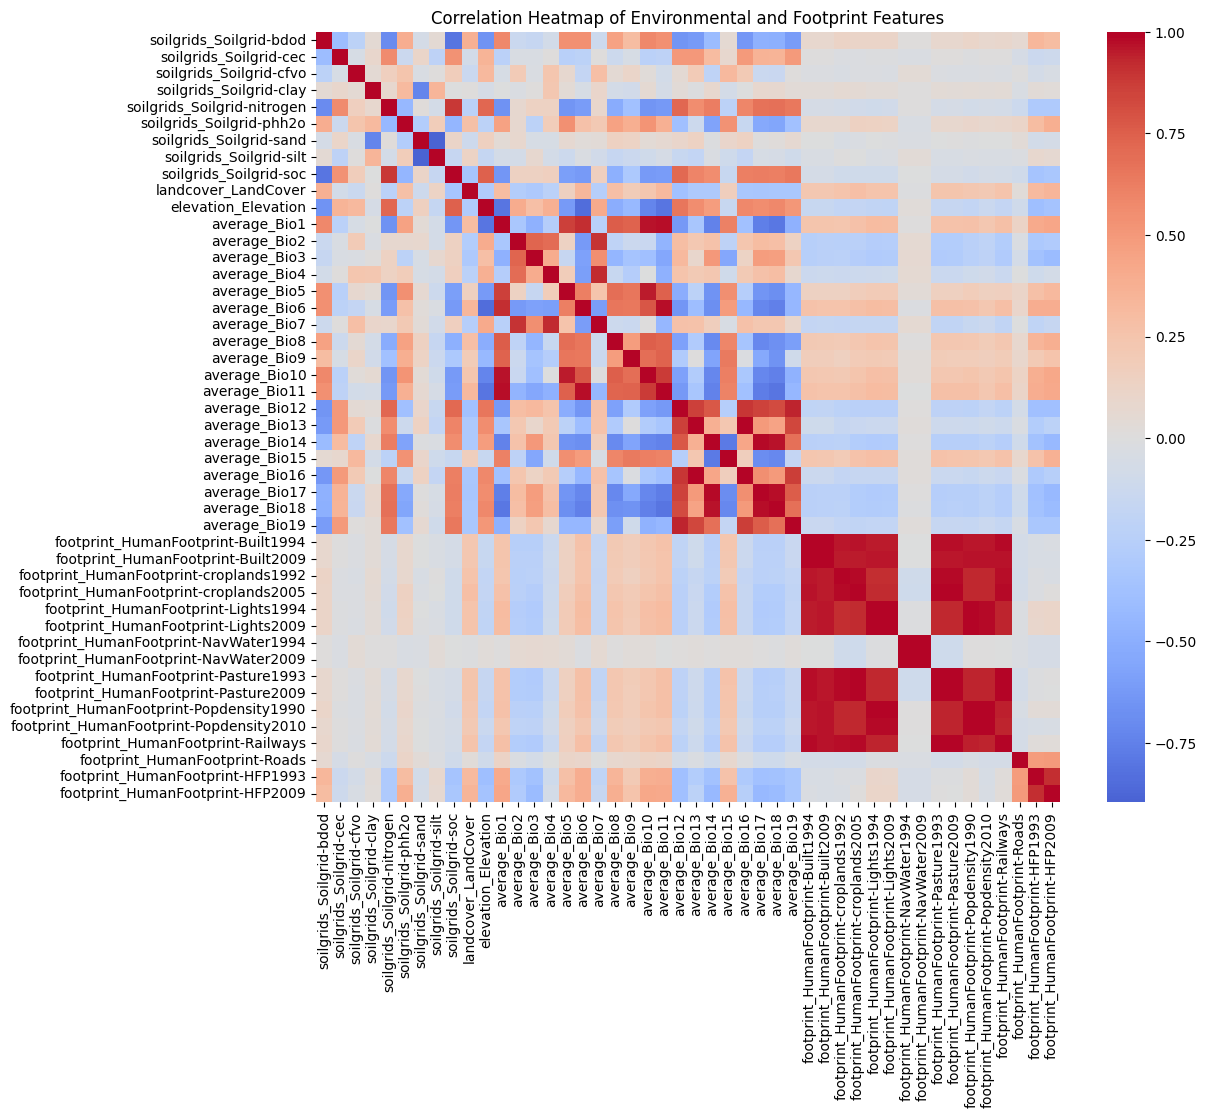

In [19]:
##plot Humanfootptint, elevation, soilgrid
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(X_clean.corr(numeric_only=True), cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Environmental and Footprint Features')
plt.show()


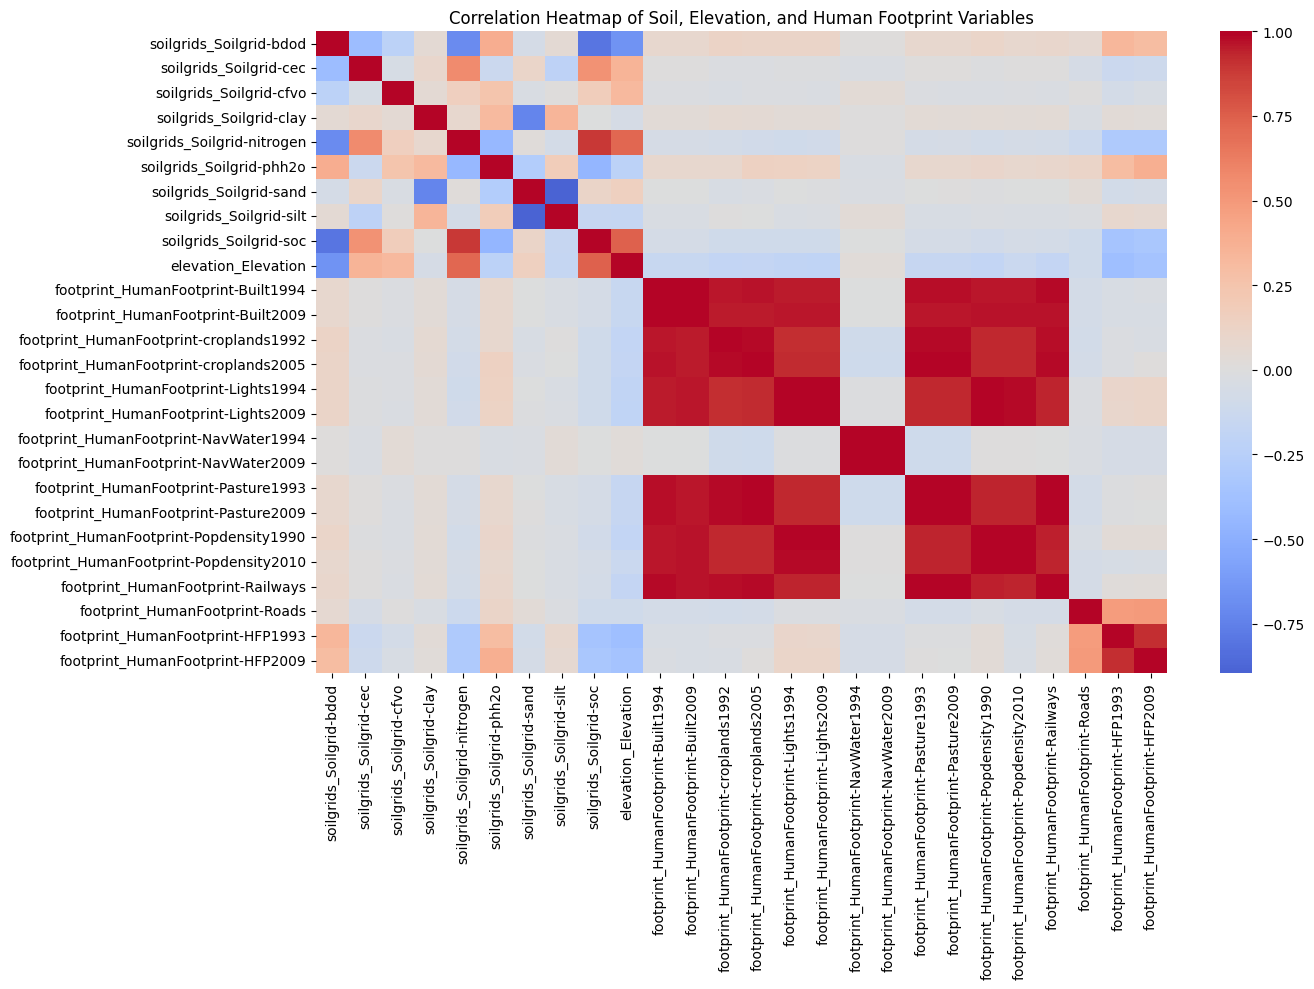

In [20]:
## plot for the


cols = [col for col in X_clean.columns if 
        'soilgrids' in col.lower() or 
        'footprint' in col.lower() or 
        'elevation' in col.lower()]

plt.figure(figsize=(14, 10))
sns.heatmap(X_clean[cols].corr(), cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Soil, Elevation, and Human Footprint Variables')
plt.tight_layout()
plt.show()


In [32]:
X_clean.describe()

,soilgrids_Soilgrid-bdod,soilgrids_Soilgrid-cec,soilgrids_Soilgrid-cfvo,soilgrids_Soilgrid-clay,soilgrids_Soilgrid-nitrogen,soilgrids_Soilgrid-phh2o,soilgrids_Soilgrid-sand,soilgrids_Soilgrid-silt,soilgrids_Soilgrid-soc,landcover_LandCover,...,footprint_HumanFootprint-NavWater1994,footprint_HumanFootprint-NavWater2009,footprint_HumanFootprint-Pasture1993,footprint_HumanFootprint-Pasture2009,footprint_HumanFootprint-Popdensity1990,footprint_HumanFootprint-Popdensity2010,footprint_HumanFootprint-Railways,footprint_HumanFootprint-Roads,footprint_HumanFootprint-HFP1993,footprint_HumanFootprint-HFP2009
count,13501.000000,13501.000000,13501.000000,13501.000000,13501.000000,13501.000000,13501.000000,13501.000000,13501.000000,13501.000000,...,13501.000000,13501.000000,13501.000000,13501.000000,13501.000000,1.350100e+04,13501.000000,13501.000000,13501.000000,13501.000000
mean,129.273091,216.503740,152.318051,259.042293,263.645063,64.257685,307.779942,430.814014,342.716540,8.705503,...,-4.976298,-4.976298,4.034275,4.139045,7.902118,5.280828e+07,8.862232,2.024378,15.737427,14.770091
std,10.184578,33.555322,36.244209,51.836206,86.244419,6.376848,109.513516,80.168206,138.954527,3.705642,...,182.489881,182.489881,20.889530,20.865412,18.999489,3.326025e+08,41.624105,2.692383,9.759904,10.477971
min,90.000000,118.000000,40.000000,99.000000,108.000000,48.000000,49.000000,139.000000,121.000000,1.000000,...,-7499.250000,-7499.250000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,124.000000,194.000000,127.000000,223.000000,202.000000,59.000000,237.000000,386.000000,246.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000e+00,0.000000,0.000000,10.000000,6.000000
50%,131.000000,213.000000,150.000000,258.000000,249.000000,64.000000,303.000000,425.000000,315.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000e+00,0.000000,1.000000,13.000000,12.000000
75%,136.000000,233.000000,175.000000,289.000000,303.000000,69.000000,372.000000,480.000000,391.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,6.000000e+00,0.000000,4.000000,21.000000,21.000000
max,155.000000,384.000000,329.000000,515.000000,678.000000,79.000000,760.000000,720.000000,1066.000000,17.000000,...,4.000000,4.000000,127.000000,127.000000,127.000000,2.147484e+09,255.000000,8.000000,50.000000,50.000000


#### for Soil data
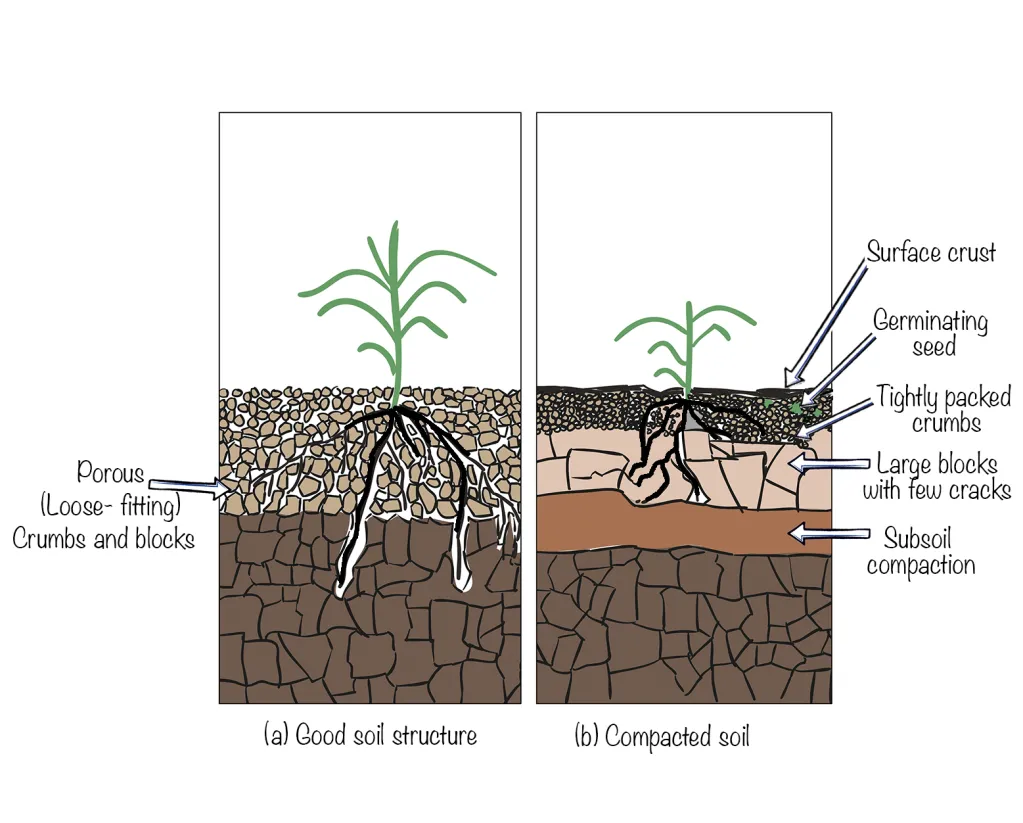

| Variable     | Meaning                  | Units    | Interpretation                                                                          |
| ------------ | ------------------------ | -------- | --------------------------------------------------------------------------------------- |
| **bdod**     | Bulk density of dry soil | kg/m³    | High values = compact soil, low porosity (less root growth). Low = loose, aerated soil. |
| **cec**      | Cation exchange capacity | cmol/kg  | High = fertile soil (more nutrient retention). Low = poor nutrient retention.           |
| **cfvo**     | Coarse fragment volume   | %        | High = many stones/rocks (less plant rooting area).                                     |
| **clay**     | Clay fraction            | %        | High = fine-textured soil, retains water/nutrients but drains poorly.                   |
| **nitrogen** | Total nitrogen content   | g/kg     | High = fertile soil, supports vegetation growth.                                        |
| **phh2o**    | Soil pH in water         | pH units | 6–7 = optimal. <5 = acidic (bad), >8 = alkaline (bad).                                  |
| **sand**     | Sand fraction            | %        | High = coarse, drains well but low nutrient retention.                                  |
| **silt**     | Silt fraction            | %        | Medium texture — balanced soil (ideal around 40%).                                      |
| **soc**      | Soil organic carbon      | g/kg     | High = healthy, fertile soil, better structure. Low = degraded soil.                    |


##### 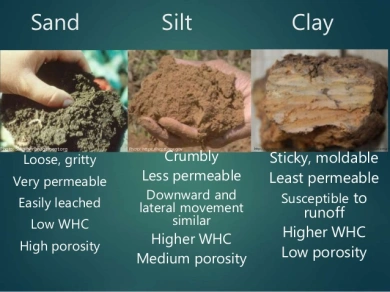

######
| Property     | Good (Healthy Soil)    | Bad (Degraded Soil)            |
| ------------ | ---------------------- | ------------------------------ |
| **bdod**     | < 130                  | > 150 (too compact)            |
| **cec**      | > 200 (high fertility) | < 150                          |
| **phh2o**    | 6–7.5                  | <5 (acidic) or >8 (alkaline)   |
| **soc**      | > 400                  | < 200                          |
| **nitrogen** | > 250                  | < 150                          |
| **sand**     | 30–60                  | >70 (too sandy, low fertility) |
| **HFP2009**  | < 10 (natural)         | > 20 (strong human pressure)   |


#### for human footprint: These come from the Global Human Footprint Index (Venter et al.) or related human pressure layers.They measure human impact between ~1990s and 2009.

| Variable                            | Meaning                         | Units                   | Interpretation                      |
| ----------------------------------- | ------------------------------- | ----------------------- | ----------------------------------- |
| **Built1994 / Built2009**           | Built-up area intensity         | 0–100                   | Higher = more urban development.    |
| **Croplands1992 / Croplands2005**   | Cropland extent                 | 0–100                   | Higher = more agriculture.          |
| **Lights1994 / Lights2009**         | Night-time light intensity      | 0–100                   | Proxy for human activity.           |
| **Pasture1993 / Pasture2009**       | Pasture area                    | 0–100                   | Livestock pressure.                 |
| **Popdensity1990 / Popdensity2010** | Population density              | people/km²              | High = more urban areas.            |
| **Railways / Roads**                | Linear infrastructure density   | arbitrary (often 0–255) | More = greater fragmentation.       |
| **HFP1993 / HFP2009**               | Composite Human Footprint Index | 0–50                    | Higher = more human pressure.       |
| **NavWater1994 / NavWater2009**     | Navigable water accessibility   | arbitrary               | Higher = closer to water transport. |


##### 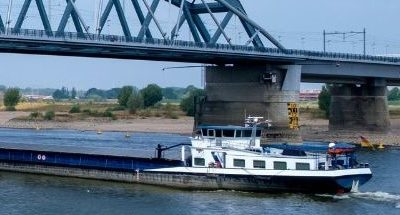


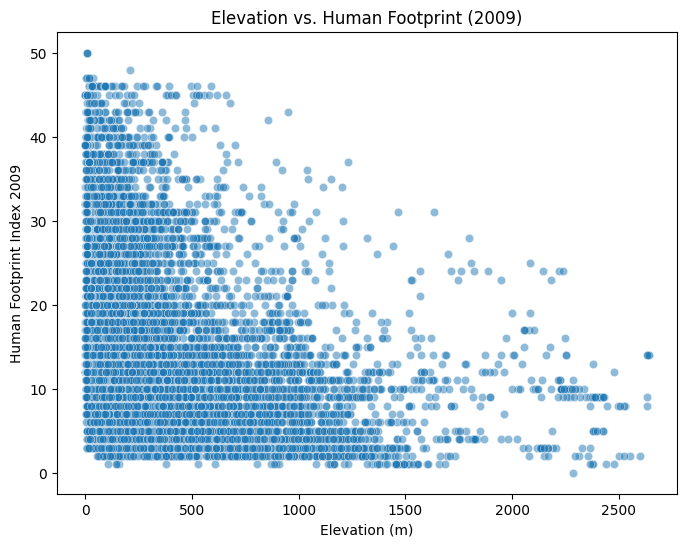

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='elevation_Elevation', 
                y='footprint_HumanFootprint-HFP2009', 
                data=X_clean, alpha=0.5)
plt.title('Elevation vs. Human Footprint (2009)')
plt.xlabel('Elevation (m)')
plt.ylabel('Human Footprint Index 2009')
plt.show()


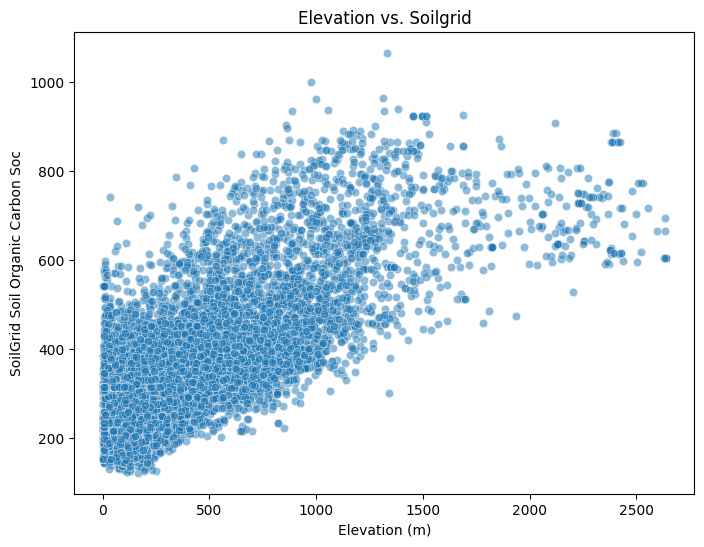

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='elevation_Elevation', 
                y='soilgrids_Soilgrid-soc', 
                data=X_clean, alpha=0.5)
plt.title('Elevation vs. Soilgrid')
plt.xlabel('Elevation (m)')
plt.ylabel('SoilGrid Soil Organic Carbon Soc')
plt.show()

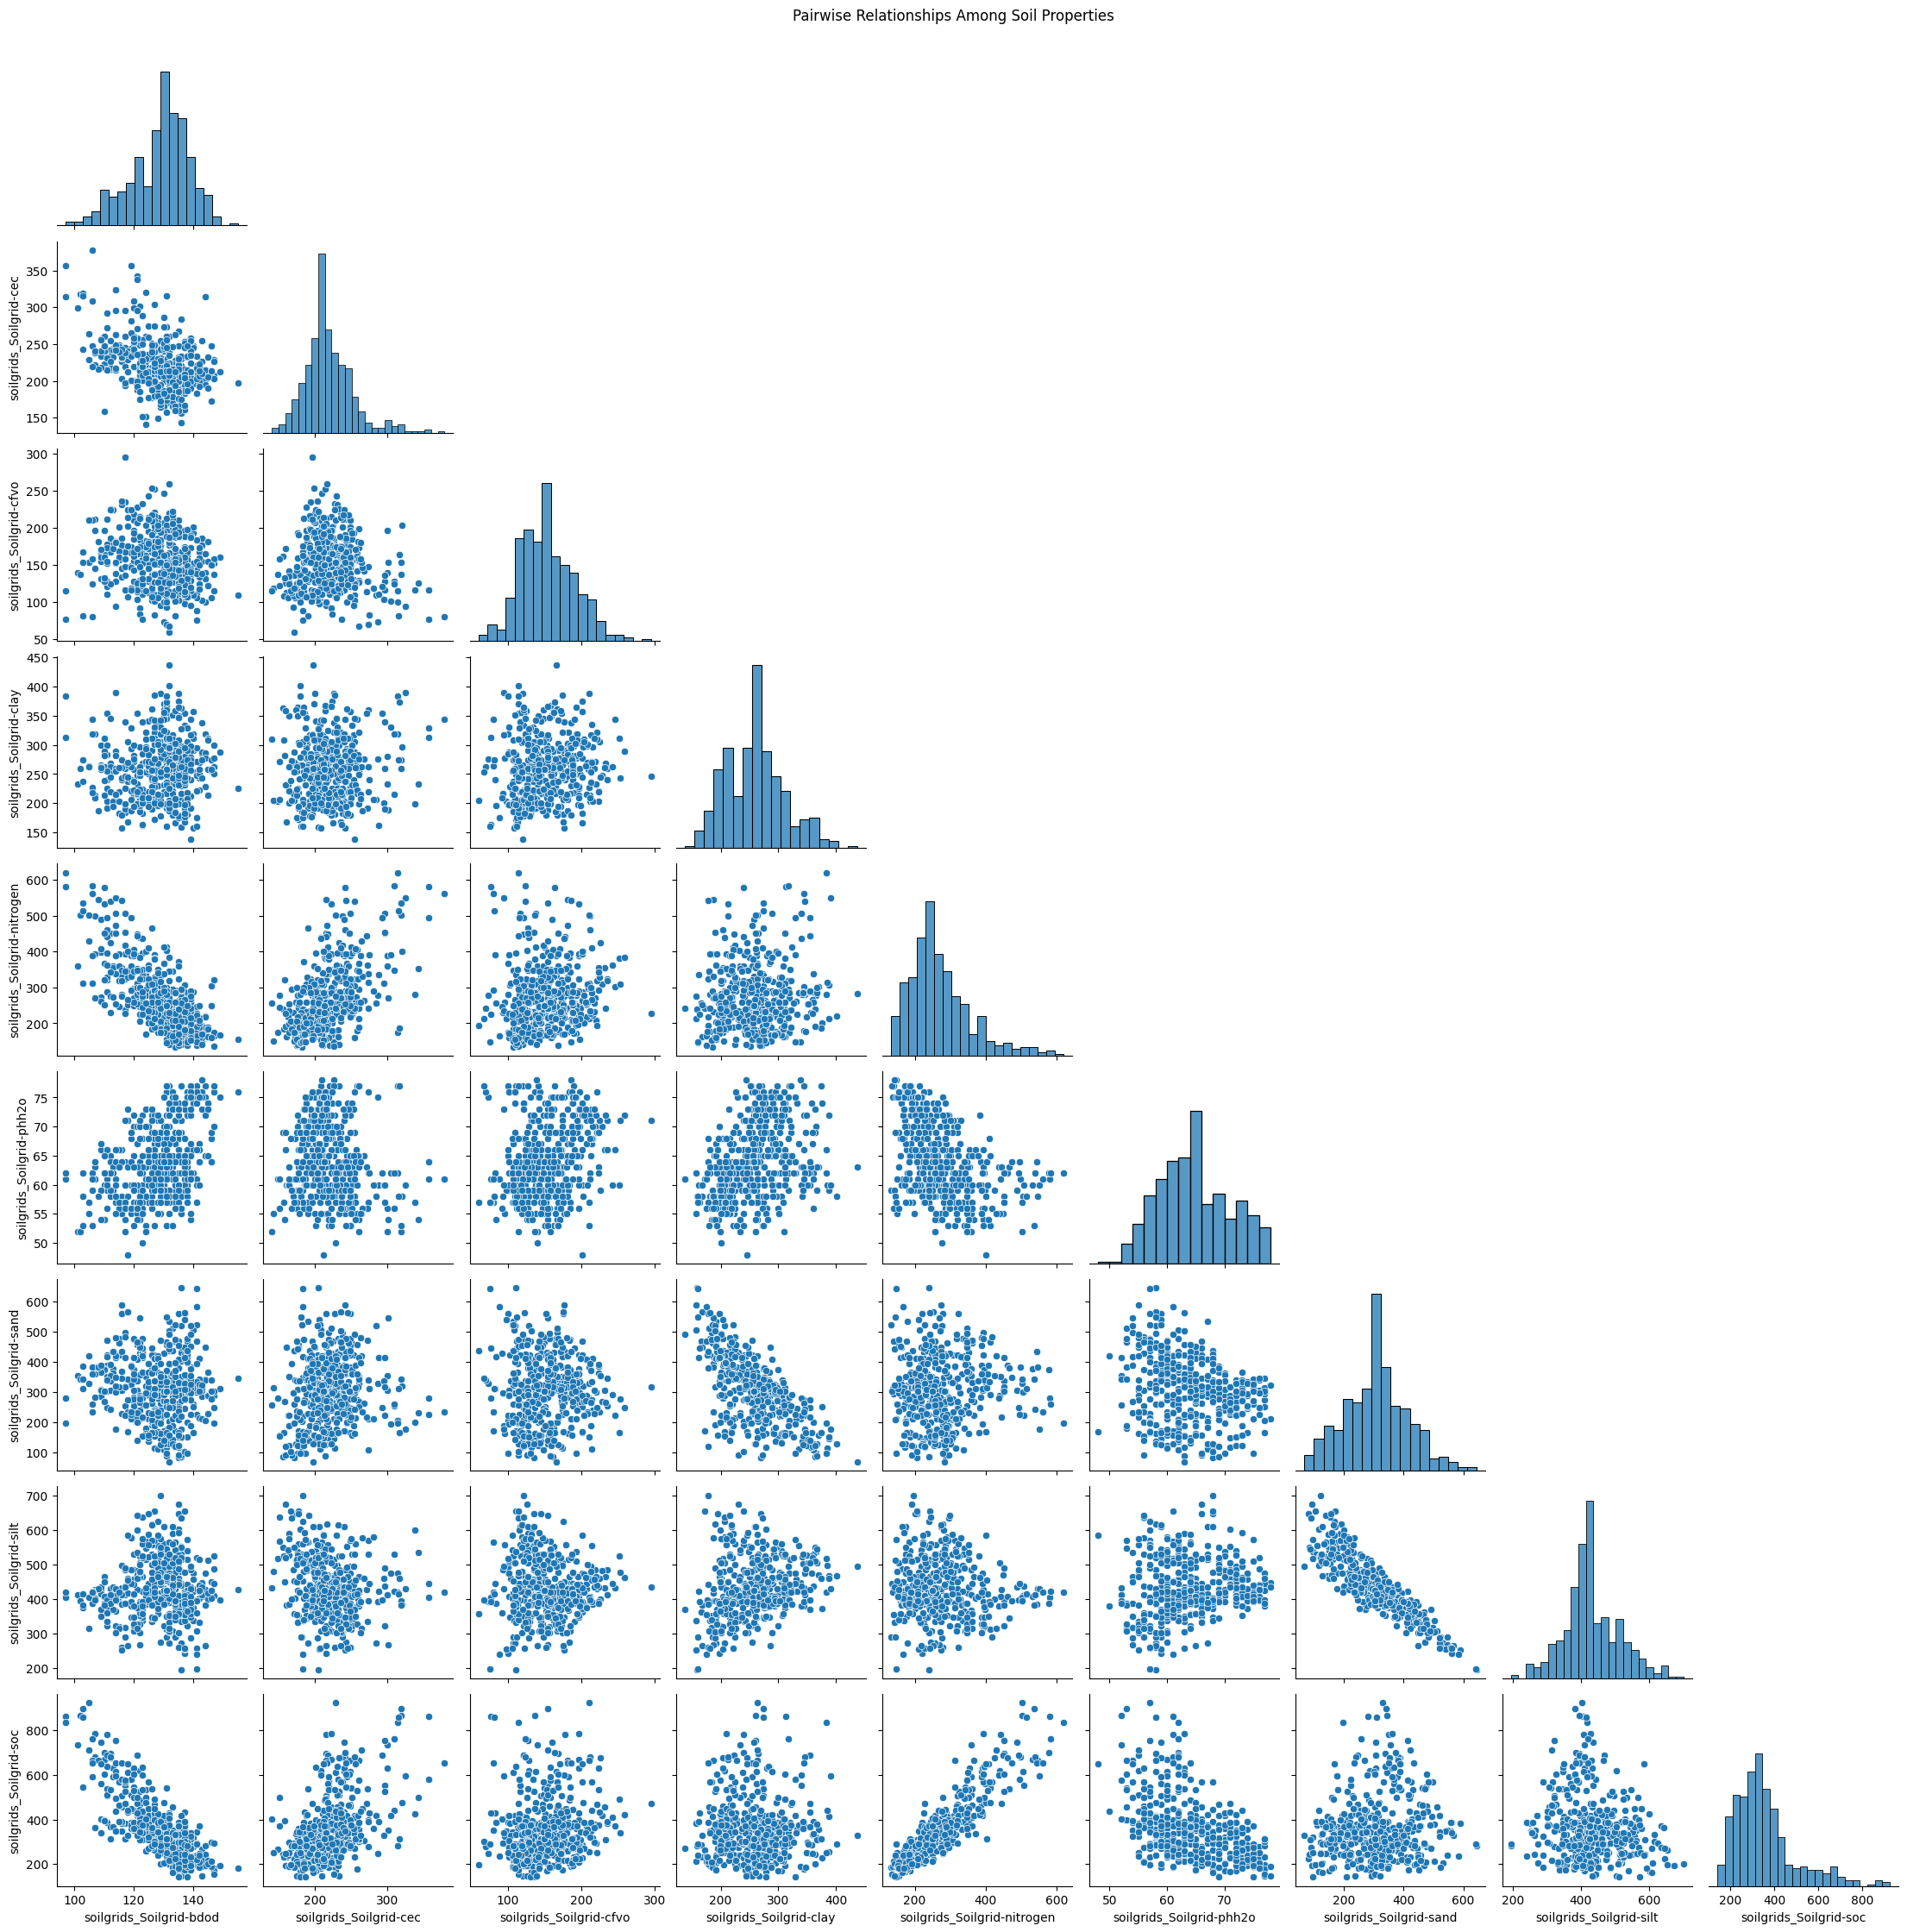

In [25]:
soil_cols = [col for col in X_clean.columns if 'soilgrids' in col.lower()]
sns.pairplot(X_clean[soil_cols].sample(500), corner=True)
plt.suptitle('Pairwise Relationships Among Soil Properties', y=1)
plt.show()


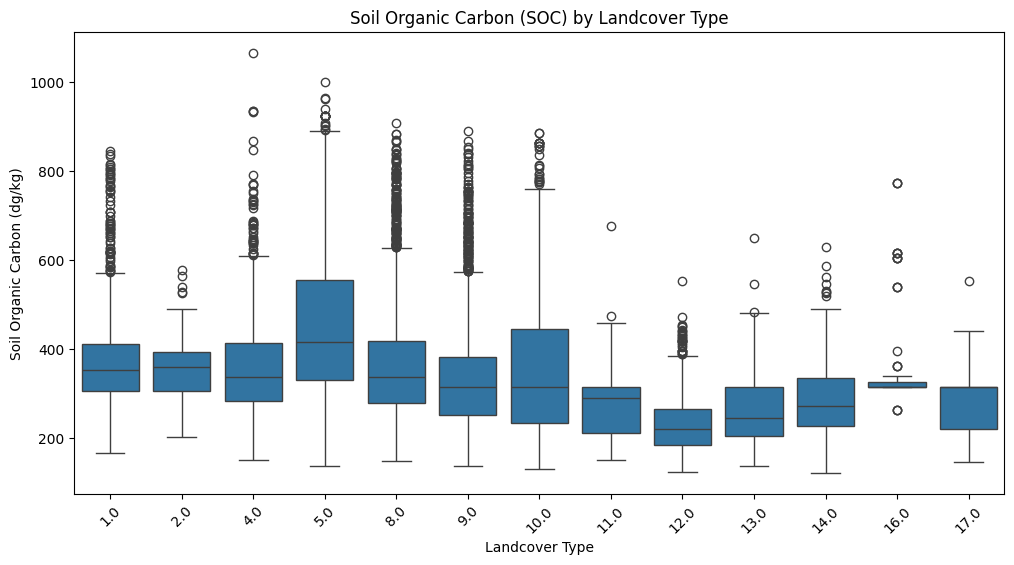

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(x='landcover_LandCover', 
            y='soilgrids_Soilgrid-soc', 
            data=X_clean)
plt.xticks(rotation=45)
plt.title('Soil Organic Carbon (SOC) by Landcover Type')
plt.xlabel('Landcover Type')
plt.ylabel('Soil Organic Carbon (dg/kg)')
plt.show()


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Select feature groups ---
soil_vars = [col for col in X_clean.columns if "soilgrids" in col]
footprint_vars = [col for col in X_clean.columns if "footprint" in col]
elev_var = ["elevation_Elevation"]

print("Soil variables:", soil_vars)
print("Human Footprint variables:", footprint_vars)


Soil variables: ['soilgrids_Soilgrid-bdod', 'soilgrids_Soilgrid-cec', 'soilgrids_Soilgrid-cfvo', 'soilgrids_Soilgrid-clay', 'soilgrids_Soilgrid-nitrogen', 'soilgrids_Soilgrid-phh2o', 'soilgrids_Soilgrid-sand', 'soilgrids_Soilgrid-silt', 'soilgrids_Soilgrid-soc']
Human Footprint variables: ['footprint_HumanFootprint-Built1994', 'footprint_HumanFootprint-Built2009', 'footprint_HumanFootprint-croplands1992', 'footprint_HumanFootprint-croplands2005', 'footprint_HumanFootprint-Lights1994', 'footprint_HumanFootprint-Lights2009', 'footprint_HumanFootprint-NavWater1994', 'footprint_HumanFootprint-NavWater2009', 'footprint_HumanFootprint-Pasture1993', 'footprint_HumanFootprint-Pasture2009', 'footprint_HumanFootprint-Popdensity1990', 'footprint_HumanFootprint-Popdensity2010', 'footprint_HumanFootprint-Railways', 'footprint_HumanFootprint-Roads', 'footprint_HumanFootprint-HFP1993', 'footprint_HumanFootprint-HFP2009']


In [34]:
# Summary statistics for soil and footprint features
desc = X_clean[soil_vars + elev_var + footprint_vars].describe().T
display(desc)


,count,mean,std,min,25%,50%,75%,max
soilgrids_Soilgrid-bdod,13501.0,1.292731e+02,1.018458e+01,90.00,124.0,131.0,136.0,1.550000e+02
soilgrids_Soilgrid-cec,13501.0,2.165037e+02,3.355532e+01,118.00,194.0,213.0,233.0,3.840000e+02
soilgrids_Soilgrid-cfvo,13501.0,1.523181e+02,3.624421e+01,40.00,127.0,150.0,175.0,3.290000e+02
soilgrids_Soilgrid-clay,13501.0,2.590423e+02,5.183621e+01,99.00,223.0,258.0,289.0,5.150000e+02
soilgrids_Soilgrid-nitrogen,13501.0,2.636451e+02,8.624442e+01,108.00,202.0,249.0,303.0,6.780000e+02
soilgrids_Soilgrid-phh2o,13501.0,6.425768e+01,6.376848e+00,48.00,59.0,64.0,69.0,7.900000e+01
soilgrids_Soilgrid-sand,13501.0,3.077799e+02,1.095135e+02,49.00,237.0,303.0,372.0,7.600000e+02
soilgrids_Soilgrid-silt,13501.0,4.308140e+02,8.016821e+01,139.00,386.0,425.0,480.0,7.200000e+02
soilgrids_Soilgrid-soc,13501.0,3.427165e+02,1.389545e+02,121.00,246.0,315.0,391.0,1.066000e+03
elevation_Elevation,13501.0,3.546521e+02,3.906600e+02,0.00,94.0,228.0,482.0,2.640000e+03


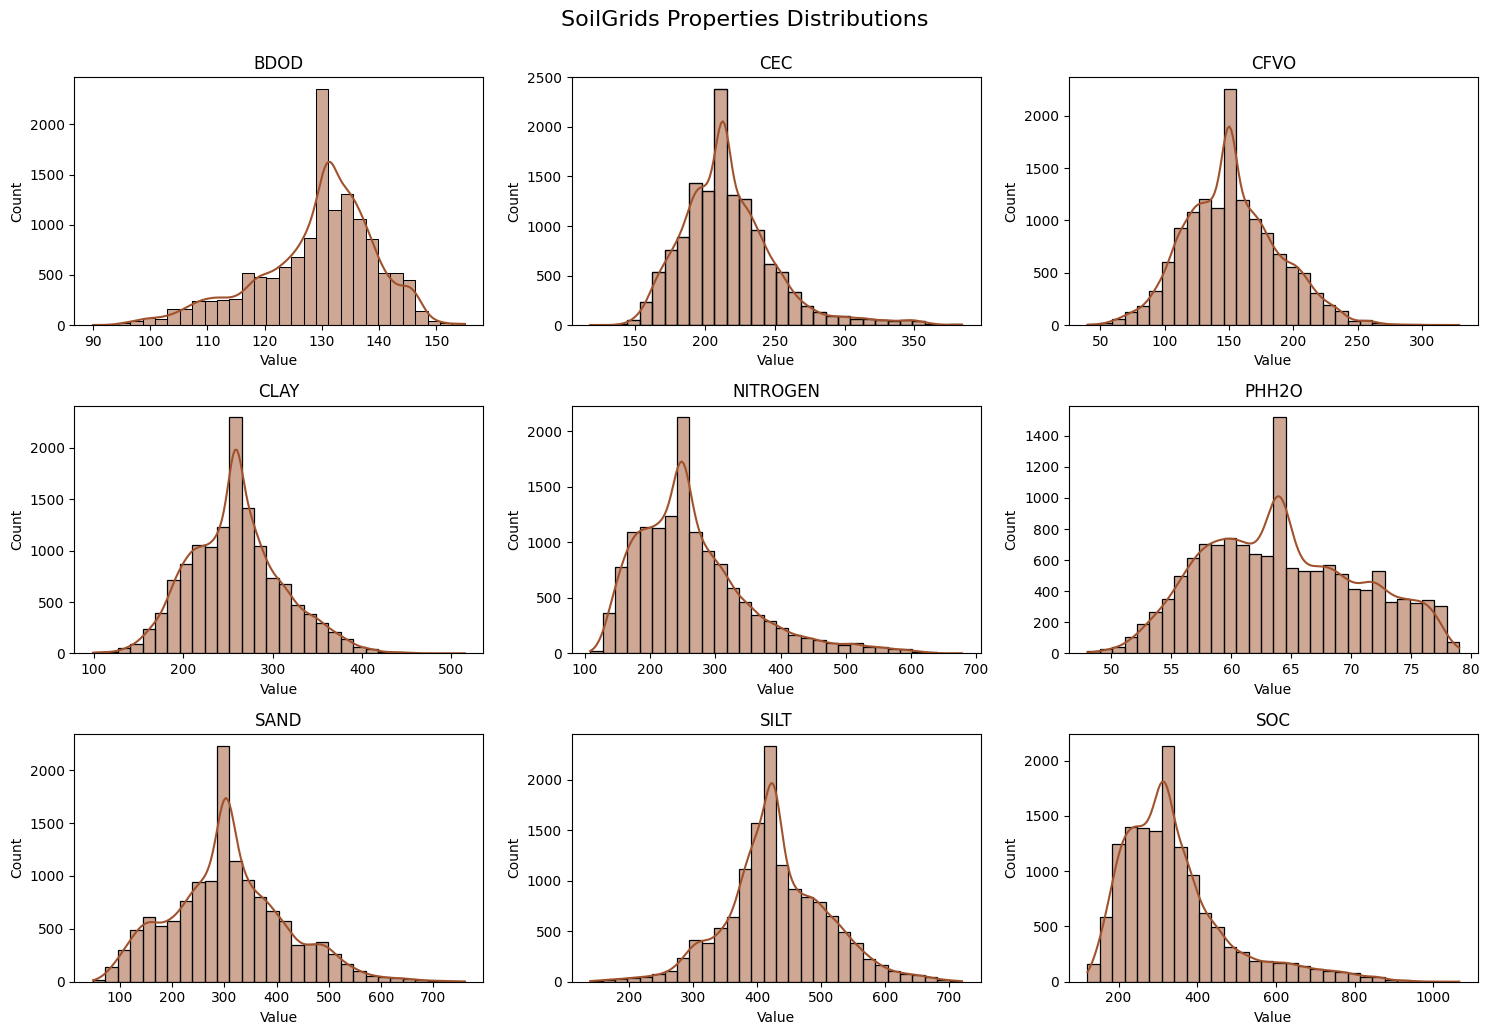

In [35]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(soil_vars[:9], 1):  # first 9 soil variables
    plt.subplot(3, 3, i)
    sns.histplot(X_clean[col], kde=True, color='sienna', bins=30)
    plt.title(col.replace("soilgrids_Soilgrid-", "").upper())
    plt.xlabel("Value")
    plt.tight_layout()
plt.suptitle("SoilGrids Properties Distributions", fontsize=16, y=1.03)
plt.show()


##### notes:
bdod (bulk density): Right-skewed = many compact soils (less healthy)

soc (organic carbon): Higher values → healthier, fertile soils

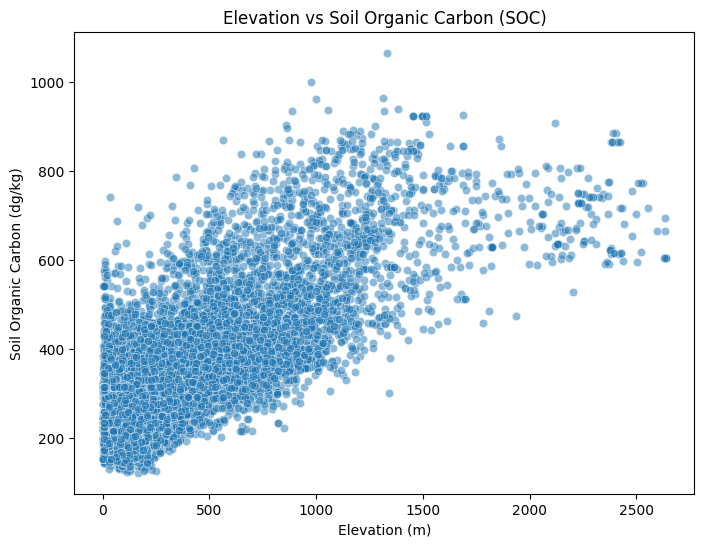

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_clean["elevation_Elevation"], y=X_clean["soilgrids_Soilgrid-soc"], alpha=0.5)
plt.title("Elevation vs Soil Organic Carbon (SOC)")
plt.xlabel("Elevation (m)")
plt.ylabel("Soil Organic Carbon (dg/kg)")
plt.show()


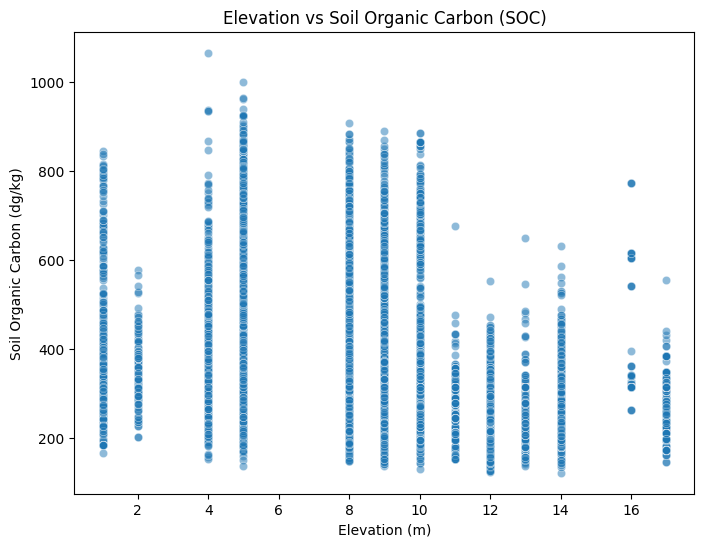

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_clean["landcover_LandCover"], y=X_clean["soilgrids_Soilgrid-soc"], alpha=0.5)
plt.title("Elevation vs Soil Organic Carbon (SOC)")
plt.xlabel("Elevation (m)")
plt.ylabel("Soil Organic Carbon (dg/kg)")
plt.show()

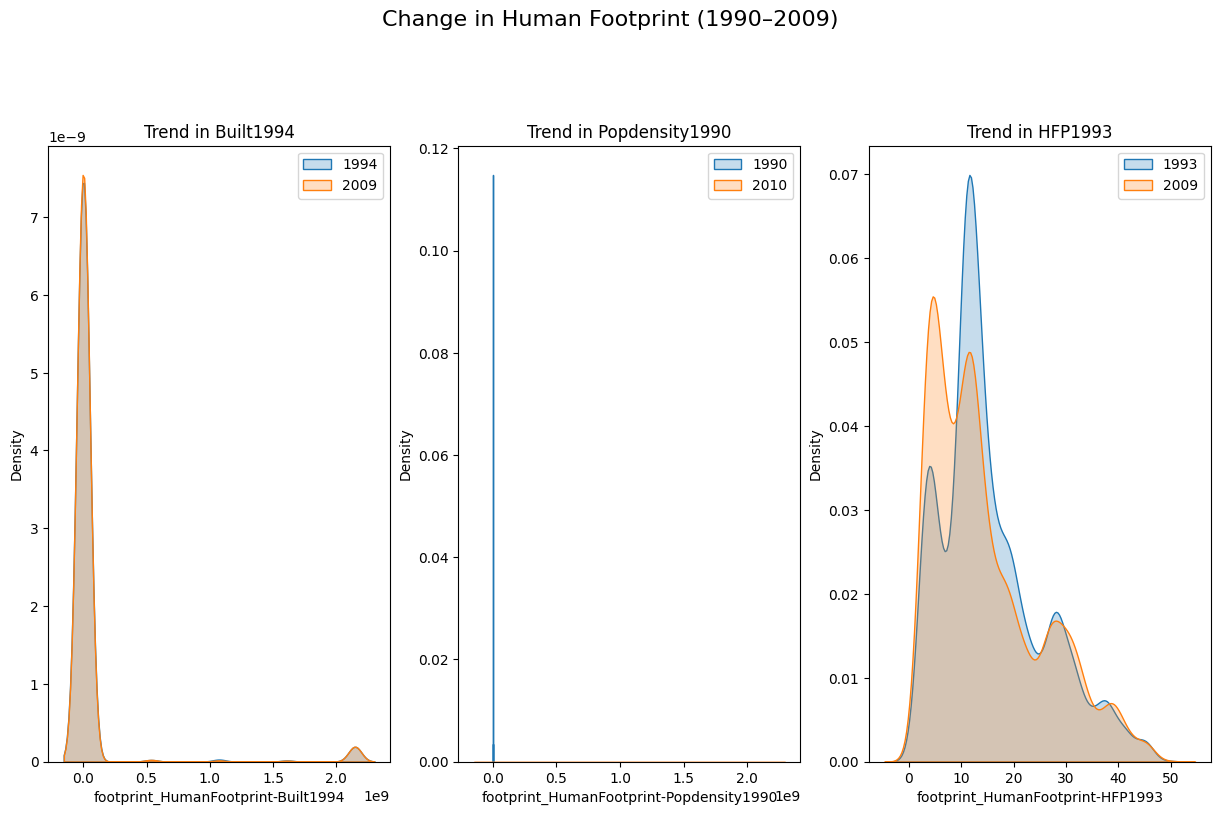

In [40]:
footprint_trend = [
    ("footprint_HumanFootprint-Built1994", "footprint_HumanFootprint-Built2009"),
    ("footprint_HumanFootprint-Popdensity1990", "footprint_HumanFootprint-Popdensity2010"),
    ("footprint_HumanFootprint-HFP1993", "footprint_HumanFootprint-HFP2009")
]

plt.figure(figsize=(15, 8))
for i, (col1, col2) in enumerate(footprint_trend, 1):
    plt.subplot(1, 3, i)
    sns.kdeplot(X_clean[col1], label=col1[-4:], fill=True)
    sns.kdeplot(X_clean[col2], label=col2[-4:], fill=True)
    plt.legend()
    plt.title(f"Trend in {col1.split('-')[1]}")
plt.suptitle("Change in Human Footprint (1990–2009)", fontsize=16, y=1.05)
plt.show()
